<a href="https://colab.research.google.com/github/Latiefabdul/Learning_Session/blob/main/Advanced_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Advanced Dataframe**

**Contents**
1. Indexing Dataframe
2. Dropping Variable/Column
3. Joining Dataframe
4. Concatenate & Append Dataframe
5. Pivot Table Dataframe
6. Melting Dataframe
7. Fungsi Lambda dalam Dataframe

___

In [ ]:
#import library
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.sort_values(by=['sex']).head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
714,24,female,22.60,0,no,southwest,2457.5020
716,49,female,22.61,1,no,northwest,9566.9909
718,51,female,36.67,2,no,northwest,10848.1343
719,58,female,33.44,0,no,northwest,12231.6136


In [ ]:
data.sort_values(by=['sex'], ascending=False).head()


,age,sex,bmi,children,smoker,region,charges
446,60,male,29.64,0,no,northeast,12730.9996
1052,49,male,29.83,1,no,northeast,9288.0267
1070,37,male,37.07,1,yes,southeast,39871.7043
550,63,male,30.80,0,no,southwest,13390.5590
1068,63,male,21.66,1,no,northwest,14349.8544


In [ ]:
data.sort_values(by='sex').head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
714,24,female,22.60,0,no,southwest,2457.5020
716,49,female,22.61,1,no,northwest,9566.9909
718,51,female,36.67,2,no,northwest,10848.1343
719,58,female,33.44,0,no,northwest,12231.6136


### Indexing Dataframe


In [ ]:
random_ = data.sample(n=10)
random_

,age,sex,bmi,children,smoker,region,charges
956,54,male,30.800,1,yes,southeast,41999.52000
71,31,male,28.500,5,no,northeast,6799.45800
214,45,female,30.900,2,no,southwest,8520.02600
1049,49,male,30.900,0,yes,southwest,39727.61400
395,46,male,19.855,0,no,northwest,7526.70645
1165,35,female,26.125,0,no,northeast,5227.98875
215,41,female,37.100,2,no,southwest,7371.77200
976,48,male,40.150,0,no,southeast,7804.16050
647,40,female,23.370,3,no,northeast,8252.28430
1046,43,female,25.080,0,no,northeast,7325.04820


In [ ]:
data.index.values

array([   0,    1,    2, ..., 1335, 1336, 1337])

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
## reset index starting from 0
random_.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,54,male,30.800,1,yes,southeast,41999.52000
1,31,male,28.500,5,no,northeast,6799.45800
2,45,female,30.900,2,no,southwest,8520.02600
3,49,male,30.900,0,yes,southwest,39727.61400
4,46,male,19.855,0,no,northwest,7526.70645
5,35,female,26.125,0,no,northeast,5227.98875
6,41,female,37.100,2,no,southwest,7371.77200
7,48,male,40.150,0,no,southeast,7804.16050
8,40,female,23.370,3,no,northeast,8252.28430
9,43,female,25.080,0,no,northeast,7325.04820


In [ ]:
## set column as index
random_.set_index('age')

,sex,bmi,children,smoker,region,charges
age,,,,,,
54,male,30.800,1,yes,southeast,41999.52000
31,male,28.500,5,no,northeast,6799.45800
45,female,30.900,2,no,southwest,8520.02600
49,male,30.900,0,yes,southwest,39727.61400
46,male,19.855,0,no,northwest,7526.70645
35,female,26.125,0,no,northeast,5227.98875
41,female,37.100,2,no,southwest,7371.77200
48,male,40.150,0,no,southeast,7804.16050
40,female,23.370,3,no,northeast,8252.28430


### Dropping Variable/Column

In [ ]:
# dropping column
data.drop(['bmi','children'], axis=1).head()

,age,sex,smoker,region,charges
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520


### Joining Dataframe


In [ ]:
data_dummy = data.iloc[:3,0:2]
data_dummy

,age,sex
0,19,female
1,18,male
2,28,male


In [ ]:
data_5 = data.loc[:4,["age","bmi"]]
data_5

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [ ]:
data_5.join(data_dummy, lsuffix='_first', rsuffix='_second')

,age_first,bmi,age_second,sex
0,19,27.900,19.0,female
1,18,33.770,18.0,male
2,28,33.000,28.0,male
3,33,22.705,NaN,NaN
4,32,28.880,NaN,NaN


### Concatenate & Append Dataframe

In [ ]:
# concatenate data in horizontal
pd.concat([data_dummy,data_5], axis=1)

,age,sex,age,bmi
0,19.0,female,19,27.900
1,18.0,male,18,33.770
2,28.0,male,28,33.000
3,NaN,NaN,33,22.705
4,NaN,NaN,32,28.880


In [ ]:
# concatenate data in vertical
pd.concat([data_dummy,data_5], axis=0)

,age,sex,bmi
0,19,female,NaN
1,18,male,NaN
2,28,male,NaN
0,19,NaN,27.900
1,18,NaN,33.770
2,28,NaN,33.000
3,33,NaN,22.705
4,32,NaN,28.880


In [ ]:
# append data
data_5.append(data_dummy)

,age,bmi,sex
0,19,27.900,NaN
1,18,33.770,NaN
2,28,33.000,NaN
3,33,22.705,NaN
4,32,28.880,NaN
0,19,NaN,female
1,18,NaN,male
2,28,NaN,male


### Pivot Table Dataframe

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# pivot table based on charges
pd.pivot_table(data, values="charges", index=["sex","smoker"], columns="region", 
               aggfunc=np.min)

#np.min = Mencari Minimum
#np.max = Mencari Maximum
#np.mean = Mencari Rata-rata

region          northeast    northwest   southeast  southwest
sex    smoker                                                
female no       2196.4732   2117.33885   1607.5101   1727.785
       yes     14283.4594  14711.74380  16577.7795  13844.506
male   no       1694.7964   1621.34020   1121.8739   1241.565
       yes     12829.4551  15817.98570  17043.3414  15820.699


**Insight Yang didapat**

1.   Hasil observasi data pivot. Dapat ditarik kesimpulan pertama bahwa perokok memiliki biaya rumah sakit terbesar dibandingkan dengan yang tidak merokok.
2.   Kesimpulan Kedua yakni BMI pada orang yang tidak merokok lebih besar daripada BMO orang yang merokok



In [ ]:
# pivot table based on bmi
pd.pivot_table(data, values="bmi", index=["sex","smoker"], columns="region", 
               aggfunc=np.max)

region         northeast  northwest  southeast  southwest
sex    smoker                                            
female no         48.070     42.940      46.75       46.7
       yes        42.750     38.950      47.41       47.6
male   no         42.655     41.325      53.13       45.9
       yes        41.895     40.565      52.58       39.9

### Melting Dataframe (Unpivot)

In [ ]:
data_melt = data.iloc[:5,:3]
data_melt

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880


In [ ]:
pd.melt(data_melt, id_vars=["sex"], value_vars=["age"])

,sex,variable,value
0,female,age,19
1,male,age,18
2,male,age,28
3,male,age,33
4,male,age,32


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
female = data[data["sex"] == "female"]
male = data[data['sex'] == "male"]
male

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [ ]:
#Summing the region in each sex
female_se=(female['region']=='southeast').sum()
female_sw=(female['region']=='southwest').sum()
female_nw=(female['region']=='northwest').sum()
female_ne=(female['region']=='northeast').sum()

#Summing the region in each sex
male_se=(male['region']=='southeast').sum()
male_sw=(male['region']=='southwest').sum()
male_nw=(male['region']=='northwest').sum()
male_ne=(male['region']=='northeast').sum()

In [ ]:
dict_data = [{'Sex':"Male", "southeast":male_se, "southwest":male_sw,\
              "northwest":male_nw, "northeast":male_ne},
             {'Sex':"Female", "southeast":female_se, "southwest":female_sw,\
              "northwest":female_nw, "northeast":female_ne}]

data_sex = pd.DataFrame(dict_data)
data_sex

,Sex,southeast,southwest,northwest,northeast
0,Male,189,163,161,163
1,Female,175,162,164,161


In [ ]:
data_sex_melt = data_sex.melt(id_vars="Sex", value_vars=['southeast','southwest','northwest','northeast'])
data_sex_melt

,Sex,variable,value
0,Male,southeast,189
1,Female,southeast,175
2,Male,southwest,163
3,Female,southwest,162
4,Male,northwest,161
5,Female,northwest,164
6,Male,northeast,163
7,Female,northeast,161


In [ ]:
data_sex_m = data_sex_melt[data_sex_melt["Sex"] == "Male"]

#color palette
ylw = '#fcd12a' # cases - yellow
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan

fig=px.treemap(data_sex_m, path=['variable'], values='value', height=500, width=800, color_discrete_sequence=[ylw, dth, rec])
fig.show()

In [ ]:
data_sex_f = data_sex_melt[data_sex_melt["Sex"] == "Female"]

#color palette
ylw = '#fcd12a' # cases - yellow
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan

fig=px.treemap(data_sex_f, path=['variable'], values='value', height=500, width=800, color_discrete_sequence=[ylw, dth, rec])
fig.show()

### Fungsi Lambda dalam Dataframe

In [ ]:
# basic lambda
test = lambda a: a*3
test(10)

30

In [ ]:
# create new variables/columns
curila = []

for i in data['bmi']:
  if i < 26:
    curila.append("Low BMI")
  else:
    curila.append("High BMI")

data_lambda = data.copy()
data_lambda['bmi_category'] = curila
data_lambda.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,High BMI
1,18,male,33.770,1,no,southeast,1725.55230,High BMI
2,28,male,33.000,3,no,southeast,4449.46200,High BMI
3,33,male,22.705,0,no,northwest,21984.47061,Low BMI
4,32,male,28.880,0,no,northwest,3866.85520,High BMI


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

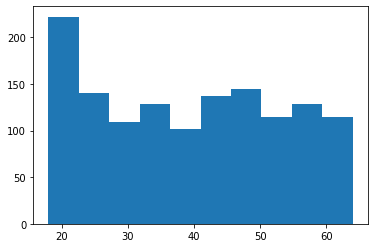

In [ ]:
plt.hist(data['age'])

## Exercise

**Create A New Category for BMI (Low, Medium, High)**

In [ ]:
# 1. Create new variables/columns with lambda
data["bmi_categ_lambda"] = data["bmi"].apply(lambda x : "High BMI" if x>=50 else ("Medium BMI" if x>=30 and x<50 else "Low BMI"))
data

,age,sex,bmi,children,smoker,region,charges,bmi_categ_lambda
0,19,female,27.900,0,yes,southwest,16884.92400,Low BMI
1,18,male,33.770,1,no,southeast,1725.55230,Medium BMI
2,28,male,33.000,3,no,southeast,4449.46200,Medium BMI
3,33,male,22.705,0,no,northwest,21984.47061,Low BMI
4,32,male,28.880,0,no,northwest,3866.85520,Low BMI
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Medium BMI
1334,18,female,31.920,0,no,northeast,2205.98080,Medium BMI
1335,18,female,36.850,0,no,southeast,1629.83350,Medium BMI
1336,21,female,25.800,0,no,southwest,2007.94500,Low BMI


In [ ]:
# 2. Pivot Table 
pd.pivot_table(data, values=["bmi"], index=["bmi_categ_lambda"], aggfunc={"bmi":[min,max,np.mean]})

bmi                  
                     max       mean    min
bmi_categ_lambda                          
HIGH BMI          53.130  52.030000  50.38
LOW BMI           29.925  25.506426  15.96
MEDIUM BMI        49.060  35.194574  30.00

In [ ]:
# 3. (Optional) set the bmi_categ_lambda, sex, and region in upper char
data[["bmi_categ_lambda"]] = data.apply(lambda x:x[["bmi_categ_lambda"]].str.upper(), axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_categ_lambda
0,19,female,27.900,0,yes,southwest,16884.92400,LOW BMI
1,18,male,33.770,1,no,southeast,1725.55230,MEDIUM BMI
2,28,male,33.000,3,no,southeast,4449.46200,MEDIUM BMI
3,33,male,22.705,0,no,northwest,21984.47061,LOW BMI
4,32,male,28.880,0,no,northwest,3866.85520,LOW BMI
